# Titanic Survival

## Data Exploration and Visualization

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [74]:
train = pd.read_csv('titanic_train.csv')

In [75]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


'\nYellow lines represent the missing values\n'

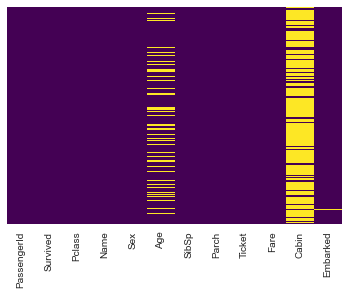

In [76]:
# missing value ploting
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
"""
Yellow lines represent the missing values
"""

In [77]:
sns.set_style('whitegrid')

In [78]:
# count plot of surviva
l or non-survival
sns.countplot(x='Survived', data=train)

NameError: name 'l' is not defined

<AxesSubplot:xlabel='Survived', ylabel='count'>

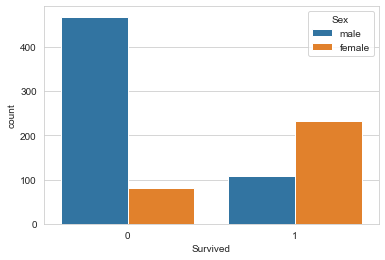

In [79]:
# survival or non-survival order by sex
sns.countplot(x='Survived', hue='Sex', data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

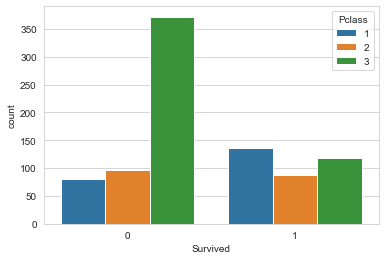

In [80]:
# survival or non-survival order by class
sns.countplot(x='Survived', hue='Pclass', data=train)

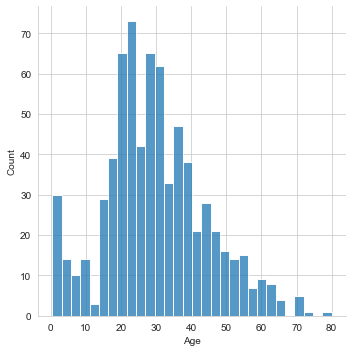

In [81]:
# distribution plot 
sns.displot(train['Age'].dropna(),bins=30)

<AxesSubplot:ylabel='Frequency'>

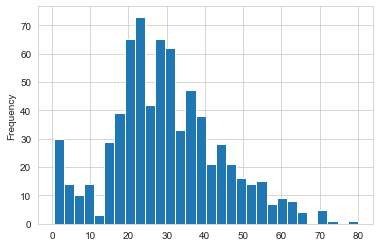

In [82]:
# pandas own hist plot
train['Age'].plot.hist(bins=30)

In [83]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

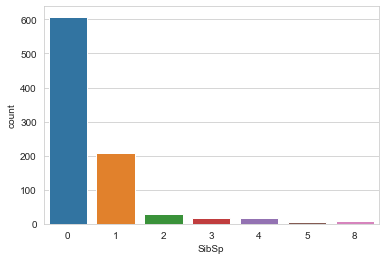

In [84]:
sns.countplot(x='SibSp',data=train)

<AxesSubplot:>

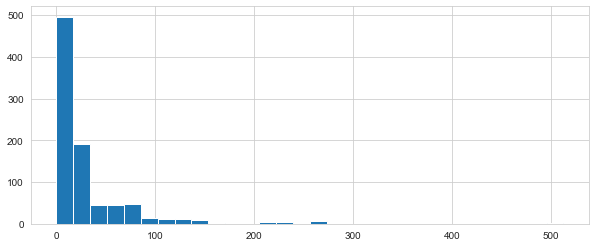

In [85]:
train['Fare'].hist(bins=30,figsize=(10,4))

In [86]:
import cufflinks as cf

In [87]:
cf.go_offline()

In [88]:
# hist plot using cufflinks
train['Fare'].iplot(kind='hist',bins=50)

## Data Cleaning

In [89]:
train[train['Pclass']==1]['Age'].mean()

38.233440860215055

In [90]:
train[train['Pclass']==2]['Age'].mean()

29.87763005780347

In [91]:
train[train['Pclass']==3]['Age'].mean()

25.14061971830986

#### Fill missing age

In [92]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass==2:
            return 29
        else:
            return 25
    else:
        return Age

In [93]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

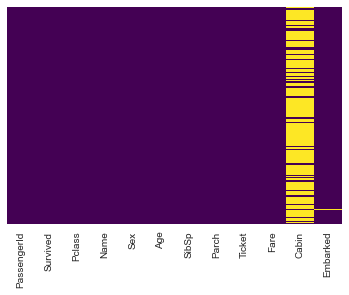

In [94]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Drop Missinng value Column

In [95]:
train.drop('Cabin',axis=1,inplace=True)

In [96]:
train.dropna(inplace=True)

Dummy Data

In [97]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [98]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [99]:
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [100]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


Concatinate

In [101]:
train = pd.concat([train,sex,embark],axis=1)

In [102]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1


Drop Column

In [103]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [104]:
train.drop('PassengerId',axis=1,inplace=True)

In [105]:
train.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1


Machine Learning

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [107]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [108]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101)

In [109]:
logmodel = LogisticRegression(solver='lbfgs',max_iter=1000)

In [110]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [111]:
predictions = logmodel.predict(X_test)

In [112]:
from sklearn.metrics import classification_report

In [113]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       163
           1       0.85      0.70      0.77       104

    accuracy                           0.84       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.84      0.84      0.83       267



In [114]:
test = pd.read_csv('titanic_test.csv')

In [115]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<AxesSubplot:>

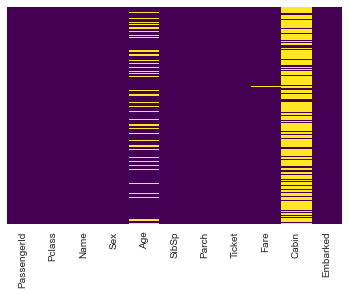

In [116]:
sns.heatmap(test.isnull(),yticklabels = False, cbar=False, cmap='viridis')

In [117]:
test.drop('Cabin',axis=1,inplace=True)

<AxesSubplot:>

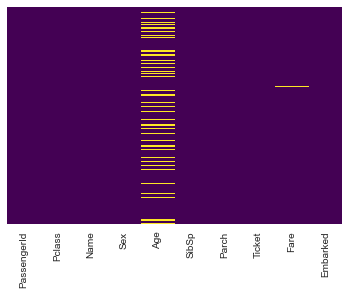

In [118]:
sns.heatmap(test.isnull(),yticklabels = False, cbar=False, cmap='viridis')

In [119]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass==2:
            return 29
        else:
            return 25
    else:
        return Age

In [120]:
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

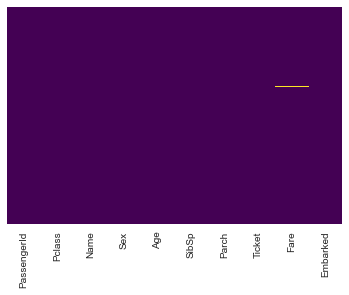

In [121]:
sns.heatmap(test.isnull(),yticklabels = False, cbar=False, cmap='viridis')

In [122]:
test[test['Pclass']==1]['Fare'].mean()

94.28029719626169

In [123]:
test[test['Pclass']==2]['Fare'].mean()

22.20210430107527

In [124]:
test[test['Pclass']==3]['Fare'].mean()

12.459677880184334

In [125]:
def impute_fare(cols):
    Fare = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Fare):
        if Pclass == 1:
            return 38
        elif Pclass==2:
            return 29
        else:
            return 25
    else:
        return Fare

In [126]:
test['Fare'] = test[['Fare','Pclass']].apply(impute_fare,axis=1)

<AxesSubplot:>

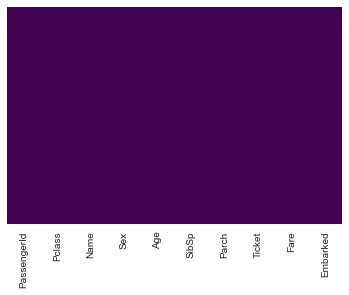

In [127]:
sns.heatmap(test.isnull(),yticklabels = False, cbar=False, cmap='viridis')

In [128]:
sex = pd.get_dummies(test['Sex'], drop_first=True)

In [129]:
sex.head()

,male
0,1
1,0
2,1
3,1
4,0


In [130]:
embark = pd.get_dummies(test['Embarked'],drop_first=True)

In [131]:
embark.head()

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [132]:
test = pd.concat([test,sex,embark],axis=1)

In [133]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1


In [134]:
test.drop(['PassengerId','Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [135]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [136]:
predicitons = logmodel.predict(test)

In [137]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       163
           1       0.85      0.70      0.77       104

    accuracy                           0.84       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.84      0.84      0.83       267

